In [25]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical


In [26]:
(x_train_load, y_train_load), (x_test_load, y_test_load) = mnist.load_data()
# 處理數據
x_train_load = x_train_load[:100]
y_train_load = y_train_load[:100]

x_test_load = x_test_load[:20]
y_test_load = y_test_load[:20]

print(x_test_load.shape)
print(y_test_load)
# print(set(y_test_load))


(20, 28, 28)
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [28]:
# Data normalization

x_train = x_train_load.reshape((x_train_load.shape[0], 28, 28, 1)).astype('float32') / 255     # ==> 39s
x_test = x_test_load.reshape((x_test_load.shape[0], 28, 28, 1)).astype('float32') / 255
# x_train = x_train_load / 255     # ==> 39s
# x_test = x_test_load / 255

# 將標籤轉換為 one-hot 編碼
y_train = to_categorical(y_train_load)
y_test = to_categorical(y_test_load)
print(x_test.shape)
print(x_test[4])


(20, 28, 28, 1)
[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.

In [29]:
print(x_test_load[0].shape)


(28, 28)


In [56]:
# 建立模型
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(20, activation='relu'),
    Dense(10, activation='softmax')
])

# 編譯模型
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# 訓練模型
history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test))



Epoch 1/50
16/16 [==============================] - 1s 37ms/step - loss: 2.1702 - accuracy: 0.2140 - val_loss: 1.9615 - val_accuracy: 0.3500
Epoch 2/50
16/16 [==============================] - 0s 8ms/step - loss: 1.7099 - accuracy: 0.5370 - val_loss: 1.5537 - val_accuracy: 0.5500
Epoch 3/50
16/16 [==============================] - 0s 7ms/step - loss: 1.3290 - accuracy: 0.7010 - val_loss: 1.2291 - val_accuracy: 0.6000
Epoch 4/50
16/16 [==============================] - 0s 7ms/step - loss: 1.0303 - accuracy: 0.7970 - val_loss: 0.9955 - val_accuracy: 0.7000
Epoch 5/50
16/16 [==============================] - 0s 7ms/step - loss: 0.8215 - accuracy: 0.8430 - val_loss: 0.8639 - val_accuracy: 0.8000
Epoch 6/50
16/16 [==============================] - 0s 7ms/step - loss: 0.6843 - accuracy: 0.8700 - val_loss: 0.7263 - val_accuracy: 0.8000
Epoch 7/50
16/16 [==============================] - 0s 6ms/step - loss: 0.5877 - accuracy: 0.8840 - val_loss: 0.6603 - val_accuracy: 0.8000
Epoch 8/50
16/16 [=

In [32]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_train)
y_pred_label = np.argmax(y_pred, axis=1)
y_train_label = np.argmax(y_train, axis=1)
cm = confusion_matrix(y_train_label, y_pred_label)

# 打印混淆矩陣
print("Confusion Matrix:")
print(cm)

32/32 [==============================] - 0s 3ms/step
Confusion Matrix:
[[ 97   0   0   0   0   0   0   0   0   0]
 [  0 115   0   0   0   1   0   0   0   0]
 [  0   0  98   0   0   0   0   0   0   1]
 [  0   0   0  93   0   0   0   0   0   0]
 [  0   0   0   0 105   0   0   0   0   0]
 [  0   0   0   0   0  92   0   0   0   0]
 [  0   0   0   0   0   0  94   0   0   0]
 [  0   0   0   0   0   0   0 117   0   0]
 [  0   0   0   0   0   0   0   0  87   0]
 [  1   0   0   0   0   0   0   0   0  99]]


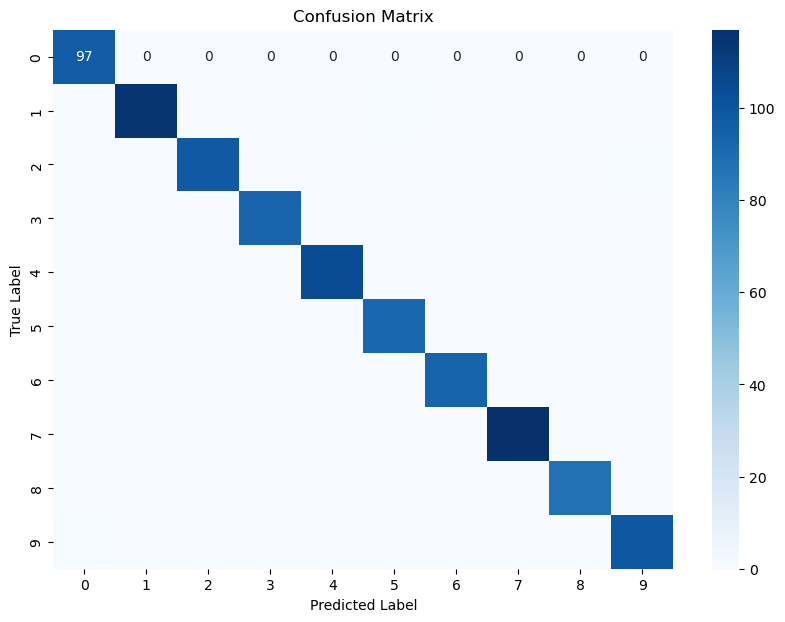

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# 繪製混淆矩陣的熱圖
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

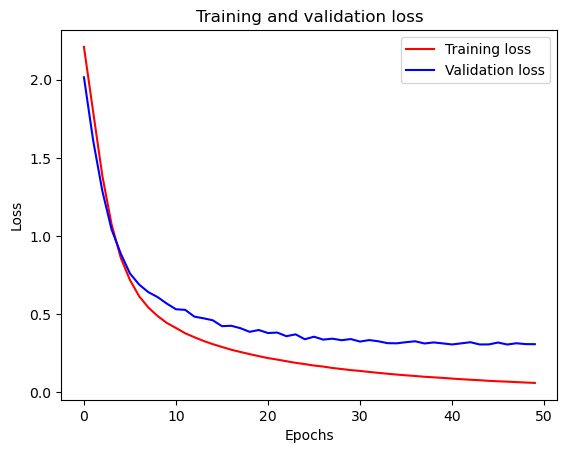

In [34]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'r', label='Training loss')
plt.plot(history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [35]:
# 評估模型
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test a|ccuracy:', test_acc)

1/1 [==============================] - 0s 31ms/step - loss: 0.3065 - accuracy: 0.9500
Test a|ccuracy: 0.949999988079071


In [36]:
y_pred = model.predict(x_test)
print(y_pred.shape)

# print(|y_pred)
y_pred_label = np.argmax(y_pred, axis=1)    
print('y_pred: ', y_pred_label)

1/1 [==============================] - 0s 35ms/step
(20, 10)
y_pred:  [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]


In [37]:
# 找出預測錯誤的索引
y_pred = model.predict(x_test)
print('y_shape: ', y_pred.shape)

y_pred_label = np.argmax(y_pred, axis=1)  # axis=1：沿著行查找每行的最大值的索引。axis=0：沿著列查找每列的最大值的索引。
y_test_label = np.argmax(y_test, axis=1)

print('y_pred: ', y_pred_label)
print('y_test: ', y_test_label)

len(x_test)
errors = np.where(y_pred_label != y_test_label)[0]
print(f'Index of Prediction errors:  {errors} ')
print(f'Total number of prediction errors: {len(errors)}')

1/1 [==============================] - 0s 41ms/step
y_shape:  (20, 10)
y_pred:  [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
y_test:  [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
Index of Prediction errors:  [8] 
Total number of prediction errors: 1


## Exercise : Try to visualize the wrong predictions

# of error image : 1


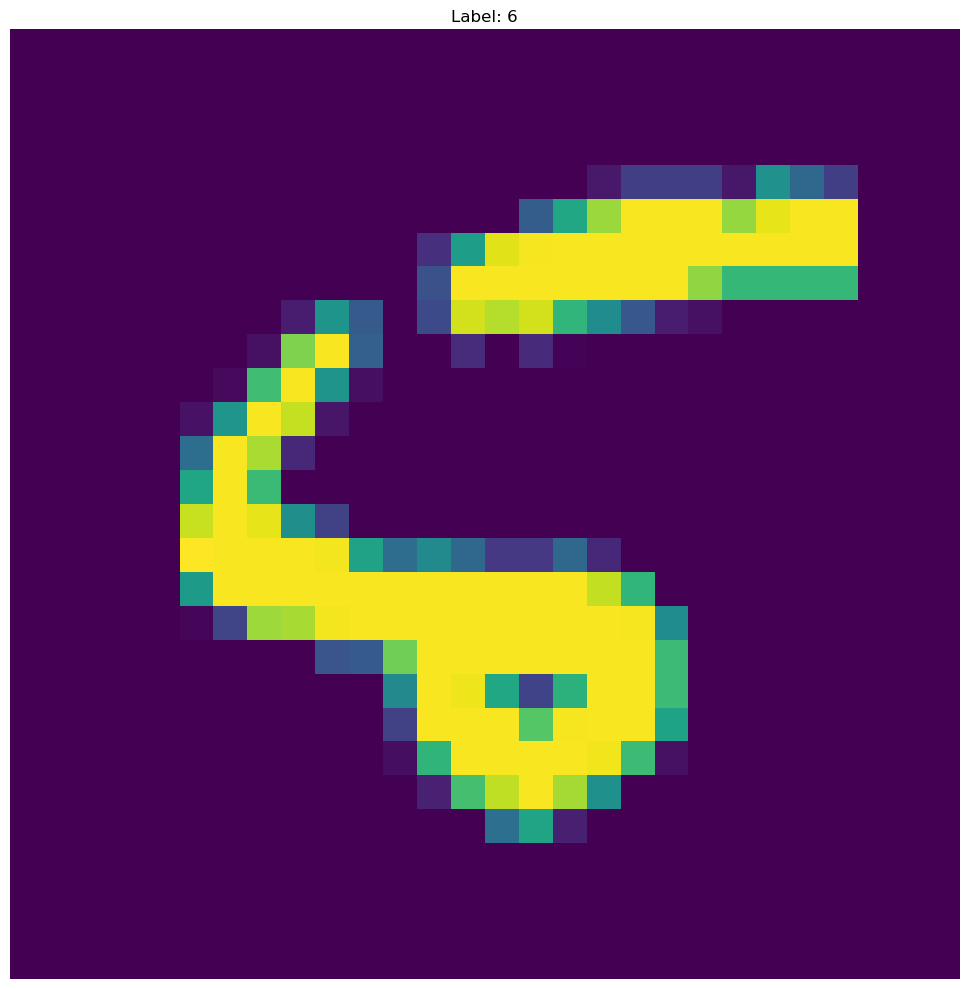